In [77]:
import pandas as pd

In [78]:
df = pd.read_pickle('test1.pkl')
df2 = pd.read_pickle('test2.pkl')

In [79]:
print(df['shorts_count'].sum())
print(df2['shorts_count'].sum())

68
19


C:\Users\Magdalene\anaconda3\envs\env_zipline\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


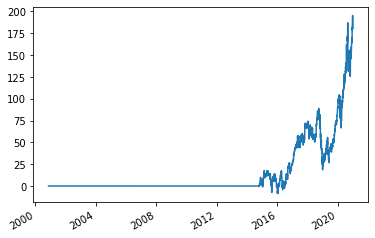

In [80]:
df['pnl'].plot();

C:\Users\Magdalene\anaconda3\envs\env_zipline\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


<AxesSubplot:>

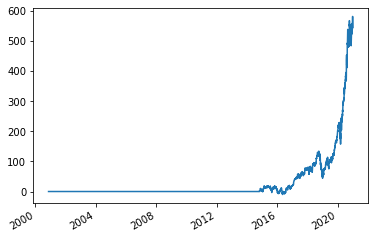

In [81]:
df2['pnl'].plot()

In [82]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
ret_pred = np.sign(np.log(df['price'] / df['price'].shift(1)).dropna())

In [84]:
train1 = df['trend'].dropna()
train30 = df2['trend'].dropna()

In [85]:
ret_pred.value_counts()

 1.0    826
-1.0    731
 0.0      3
Name: price, dtype: int64

In [86]:
train1.value_counts()

[1.0]     1493
[-1.0]      68
Name: trend, dtype: int64

In [87]:
hits1 = np.sign(ret_pred * train1[1:]).value_counts()
hits1

 1    811
-1    746
 0      3
dtype: int64

In [88]:
hits30 = np.sign(ret_pred * train30[1:]).value_counts()
hits30

 1    824
-1    733
 0      3
dtype: int64

In [89]:
print("Accuracy from training once: ", str(hits1[1]/sum(hits1)))
print("Accuracy from training periodically", str(hits30[1]/sum(hits30)))

Accuracy from training once:  0.5198717948717949
Accuracy from training periodically 0.5282051282051282


C:\Users\Magdalene\anaconda3\envs\env_zipline\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)
C:\Users\Magdalene\anaconda3\envs\env_zipline\lib\site-packages\pandas\plotting\_compat.py:57: MatplotlibDeprecationWarning: 
The compare_versions function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  return matplotlib.compare_versions('2.0.0', matplotlib.__version__)


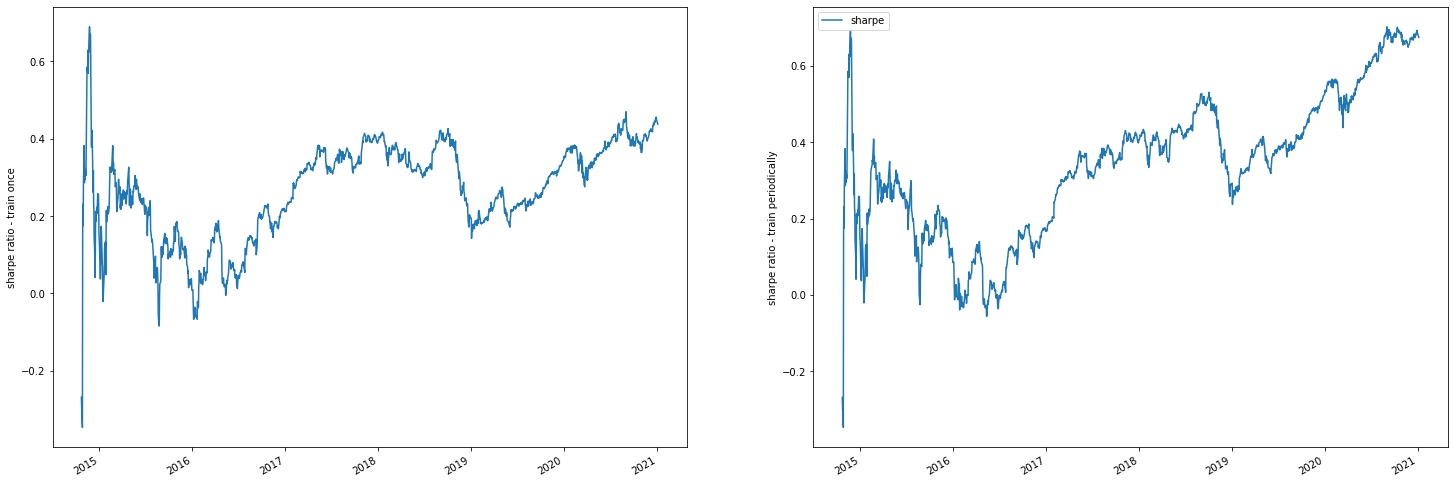

In [90]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=[25,9])

df['sharpe'].plot(ax=ax[0])
ax[0].set_ylabel('sharpe ratio - train once')
plt.title

df2['sharpe'].plot(ax=ax[1])
ax[1].set_ylabel('sharpe ratio - train periodically')

plt.legend()
plt.show()
